# Making an Spectral Index Error Plot with Increasing Chroma.

This notebook is Tutorial 2 of the [```CosmosCanvas```](https://github.com/mlarichardson/CosmosCanvas) package. This Python 3 tutorial highlights the creation of a perception-based colour map designed for plotting spectral index error data. See Tutorial 1 for more discussion.

The galaxy from Tutorial 1 has uncertainties for the spectral index. We have created a default colourmap approach for error maps, but it has more flexibility for the user. The default approach provides a constant colour that transitions from gray (0 chroma) at low error, to orange (high chroma) at high error. The user can choose what fraction of the range of values should have low chroma by choosing the position in the colour map that corresponds to the half-chroma value.  This half-chroma point by default has low luminosity, so you can see transitions both in low-error regions, and high-error regions. The example below uses a range of [0:1] and a default of 50% for the half-chroma point. 

The user can adjust all of these choices, including the maximum chroma value, the luminosity values at the top and bottom of the colourbar as well as at the half-chroma point, and finally the hue value(s) for the colour map (more on this below).

*Tutorial Aims*: This tutorial begins by outlining the creation of the spectral index error colour map using default and arbitrary settings. We then produce an error map for data measuring the uncertainties in spectral index. This uses cmap = specindex_error in `specindex.py` and demonstrates different parameter settings.

*Package*
This package includes `specindex.py`, `velmap.py` and `galfits.py` for plotting; the latter requires the installation of `Astropy`.
Additionally it uses the [```colourspace```](https://github.com/gillesferrand/colourspace) package by Gilles Ferrand for making custom colour maps in LCH colour space.

Authors: Mark L. A. Richardson, Gilles Ferrand, and Jayanne English, 7 Jan 2021. Updated JE and GF 8 Feb 2023

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Import our package and the colourspace package
import specindex as spx
import galfits as gal
from colourspace import maps

convertor = 'custom' (illuminant = 'D65')


In [3]:
# Make a folder for saving figures.
import os
plt_dir = 'plots'
if not os.path.exists(plt_dir): os.makedirs(plt_dir)

In [4]:
cmap_error_default = 'CC-specindex-error-default'
spx.create_cmap_specindex_error(name=cmap_error_default)

loading gamut from /Users/english/pythonPackages/colourspace/gamut/Cmax_res10_full.npy
creating cmap 'CC-specindex-error-default' for Matplotlib (1024 steps)
registering cmap 'CC-specindex-error-default' to Matplotlib


Similar to how we compared two colour maps in workbook 1, we can use `colourspace`'s `maps.test_cmaps` routine to showcase a single colour map. The default title is the colourmap name, but you can pass in a list of titles in the same order as `names`. 

writing  ./plots/testcmap_CC-specindex-error-default.png


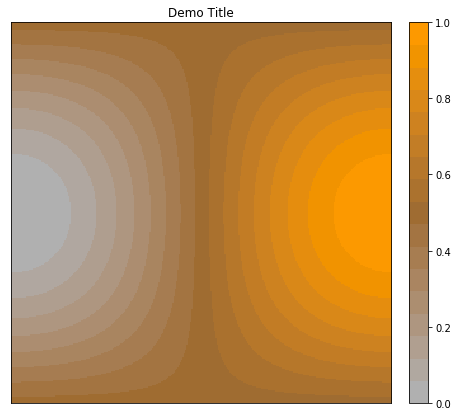

In [5]:
maps.test_cmaps(names=[cmap_error_default],nsteps=[17],figsize=(12,7),fname=plt_dir+'/testcmap',titles=["Demo Title"])

loading gamut from /Users/english/pythonPackages/colourspace/gamut/Cmax_res10_sRGB.npy


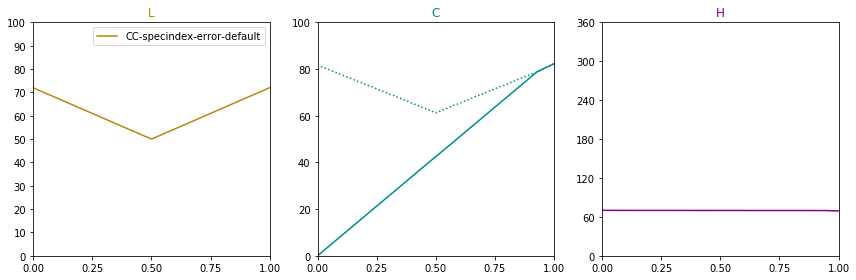

In [6]:
# Let's show the default colour map in LCH space, using the plot_path function.
axes = maps.plot_path(cmap_error_default, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label=cmap_error_default)

Luminosity L stays high with a dip in the middle. Chroma C rises linearly (as much as gamut allows) from zero to the max; the dotted line shows the limits for chroma in the gamut of the sRGB colour space. Hue H stays constant.

Let's look at the galaxy's uncertainty in spectral index data using the default colour map. Here the error/uncertainty data files are also provided in the example_data folder of `CosmosCanvas`.

In [7]:
# Set galaxy information
title='NGC 3079 error'
errfits_file="example_data/SpecIndexError_N3079.FITS"
RA = [10., 1., 57.8]    # hh.mm.ss
DEC = [55., 40., 47.0] # deg.mm.ss
#For Rectangle images set
TrimSwitch='rectangle'
ImgWidth=0.08 #degrees
ImgHeight=0.09 #degrees
ImgSize = [ImgWidth, ImgHeight]# degrees
#  For square images simply set ImgWidth=ImgHeight
shift = [0.0, 0.2/60.] # degrees

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


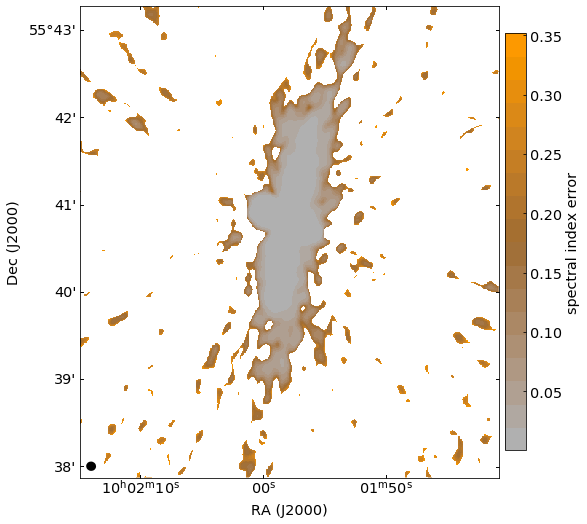

In [8]:
nsteps=18
cbar_name='spectral index error'
fig,ax = gal.plot_galaxy(errfits_file,RA,DEC,ImgSize,shift,cmap_error_default,nsteps=nsteps,cb_name=cbar_name,TrimSwitch=TrimSwitch,figsize=(8,9))
fig.savefig(plt_dir+'/plot_galerr_default_Jan2023.png', bbox_inches = "tight", dpi=300)

For this galaxy, we see that the vast majority of data values have very low associated noise. We choose to shift the mid-chroma point to 25% of the colourmap. We do this using the c_mid parameter. 

In [9]:
cmap_error_A = 'CC-specindex-error-25'
spx.create_cmap_specindex_error(c_mid=0.25,name=cmap_error_A)

creating cmap 'CC-specindex-error-25' for Matplotlib (1024 steps)
registering cmap 'CC-specindex-error-25' to Matplotlib


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


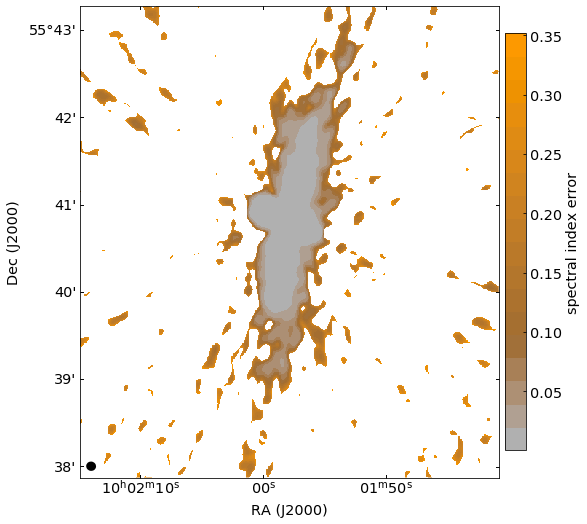

In [10]:
fig,ax = gal.plot_galaxy(errfits_file,RA,DEC,ImgSize,shift,cmap_error_A,nsteps=nsteps,cb_name=cbar_name,TrimSwitch=TrimSwitch,figsize=(8,9))
fig.savefig(plt_dir+'/plot_galerr_default.png', bbox_inches = "tight", dpi=300)

To produce a plot that appears continuous, you can again increase nsteps. 

There are more optional arguements in *create_cmap_specindex_error* in `specindex.py`. For example one could change the constant colour, create a range of colours, and, in analogy with chroma, shift the fraction of the range that has low luminosity.

In [11]:
# Change the fraction that is luminous by changing L_mid (default = 50) to L_mid=80.
# Note the default L at the top and bottom of the colour map is L_ends=72.
cmap_error_B = 'CC-specindex-error-25-L80'
spx.create_cmap_specindex_error(c_mid=0.25,L_mid=80,name=cmap_error_B)

creating cmap 'CC-specindex-error-25-L80' for Matplotlib (1024 steps)
registering cmap 'CC-specindex-error-25-L80' to Matplotlib


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


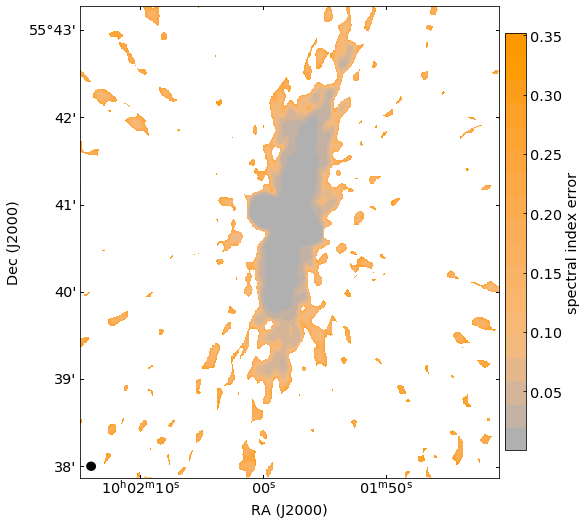

In [12]:
fig,ax = gal.plot_galaxy(errfits_file,RA,DEC,ImgSize,shift,cmap_error_B,nsteps=nsteps,cb_name=cbar_name,TrimSwitch=TrimSwitch,figsize=(8,9))
fig.savefig(plt_dir+'/plot_galerr_L80_Jan2023.png', bbox_inches = "tight", dpi=300)

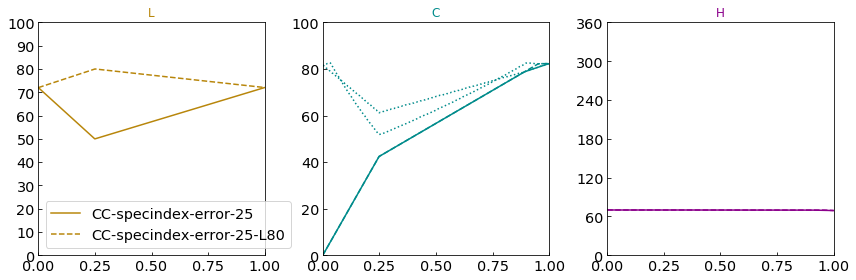

In [13]:
# Let's show the two new colour maps in LCH space, using the plot_path function.
axes = maps.plot_path(cmap_error_A, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label=cmap_error_A)
axes = maps.plot_path(cmap_error_B, space='LCH', stack='H', axes=axes, styles=['--'], legend_label=cmap_error_B)

In [14]:
# Create a number of colours within the high error range.

# The default for the constant orange is H_0=70. and H_min = H_max = none. 
# For a range of colours, H_0 is not used. Instead we set H_max = 70 and  H_min = 250 to cover 
# 180 degrees on the colour wheel. This creates numerous colours and includes the orange's complementary colour.

cmap_error_C = 'CC-specindex-error-hueV1'
spx.create_cmap_specindex_error(c_mid=0.25,H_min=250.,H_max=70.,name=cmap_error_C)

creating cmap 'CC-specindex-error-hueV1' for Matplotlib (1024 steps)
registering cmap 'CC-specindex-error-hueV1' to Matplotlib


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


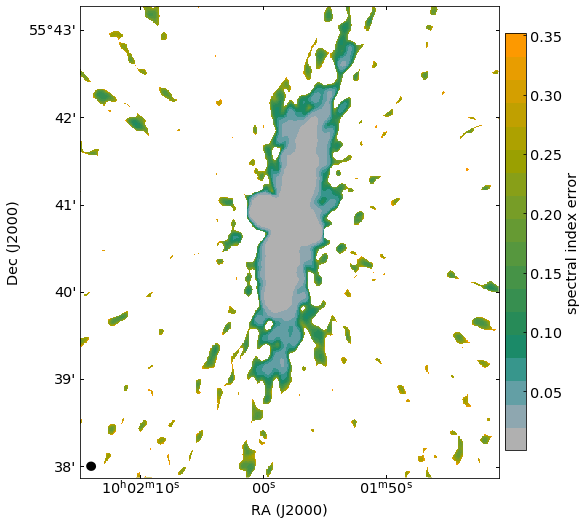

In [15]:
fig,ax = gal.plot_galaxy(errfits_file,RA,DEC,ImgSize,shift,cmap_error_C,nsteps=nsteps,cb_name=cbar_name,TrimSwitch=TrimSwitch,figsize=(8,9))
fig.savefig(plt_dir+'/plot_galerr_hueV1_Jan2023.png', bbox_inches = "tight", dpi=300)

Similarly you can set `H_mid` if you don't want the hue to change in one end or the other. Where we see this being of most use is for the hue to remain constant in the low-uncertainty regime where chroma is low.

In [16]:
# Colour in high error range only: set H_max and H_mid

# The default for the constant orange is H_0=70. and H_min = H_max = none. 
# For a range of colours, H_0 is not used. Instead here we set H_max = 70 and  H_mid = 250 to cover 
# 180 degrees on the colour wheel. This creates numerous colours and includes the orange's complementary colour.

cmap_error_D = 'CC-specindex-error-hueV2'
spx.create_cmap_specindex_error(c_mid=0.25,H_mid=250.,H_max=70.,name=cmap_error_D)

creating cmap 'CC-specindex-error-hueV2' for Matplotlib (1024 steps)
registering cmap 'CC-specindex-error-hueV2' to Matplotlib


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


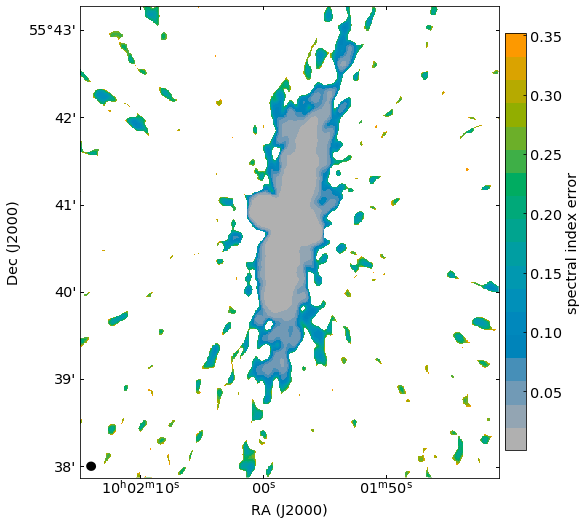

In [17]:

fig,ax = gal.plot_galaxy(errfits_file,RA,DEC,ImgSize,shift,cmap_error_D,nsteps=nsteps,cb_name=cbar_name,TrimSwitch=TrimSwitch,figsize=(8,9))
fig.savefig(plt_dir+'/plot_galerr_hueV2_Jan2023.png', bbox_inches = "tight", dpi=300)

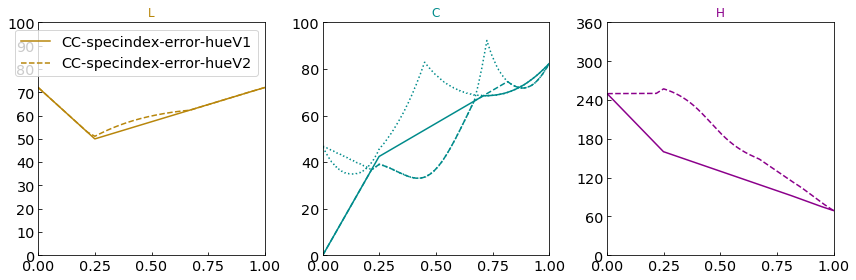

In [18]:
# Let's show the two new colour maps in LCH space, using the plot_path function.
axes = maps.plot_path(cmap_error_C, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label=cmap_error_C)
axes = maps.plot_path(cmap_error_D, space='LCH', stack='H', axes=axes, styles=['--'], legend_label=cmap_error_D)